<img src=https://www.ieseg.fr/wp-content/uploads/IESEG-Logo-2012-rgb.jpg width="500">


## Credit Scoring - Individual Assignment

#### Project Description
1) Apply the credit scoring meathods learned in class to build an application scorecard
2) Apply survival analysis techniques on the home load dataset (See 2nd notebook)

- Functions and code based on in class exercises solution.
- See the end of this notebook for a list of complete refferences.

##### Data Set
Loan Accepts Data with 18549 rows and 29 columns.
<br>
Loan Rejects Dataset with 9112 rows and 28 columns.

Introduction
- You have been hired as a data scientist by a financial institution which extends loans to subprime customers and your first assignment is to develop an application credit scorecard.
- A partially anonymized dataset is provided for both a (representative) sample of accepted applicants and a sample of rejected applicants, as well as a description of the dataset.
- There are several steps and decisions to be made in developing a credit scorecard, which you must make independently and report upon allowing a colleague from the validation team to exactly understand and reproduce the model you developed; therefore, it is crucial to report the process in detail and motivate the various choices you made.
- The final model, i.e., credit scorecard, should be presented and discussed, and clearly a thorough evaluation of the performance of the model is required.
- The bank requires you to develop the best possible scorecard that minimizes operational risk and associated cost. They provide you the following metrics: Loss given default is
defined as 75%, risk-free interest rate is defined as 1.5%.
- In addition, you are asked to explore the development of a survival analysis model.

------------

#### 0) Pre-environement - Set working directory

In [122]:
%%time
#Set data files path
%cd "c:/Users/irana/OneDrive - IESEG/Documents/Courses/Semester_2/Credit_Scoring/ind_prj/Project/data"

c:\Users\irana\OneDrive - IESEG\Documents\Courses\Semester_2\Credit_Scoring\ind_prj\Project\data
CPU times: total: 0 ns
Wall time: 988 µs


--------

#### 1) Load Libraries

In [2]:
%%time
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


from collections import defaultdict

from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import *
from sklearn.model_selection import GridSearchCV, train_test_split

from Binning import WOE

import pandas as pd 
import numpy as np 
from collections import defaultdict
import plotly.graph_objects as go

from sklearn.linear_model       import LogisticRegression
from sklearn.ensemble           import RandomForestClassifier
from sklearn.metrics            import *
from sklearn.model_selection    import GridSearchCV, train_test_split

# conda install -c conda-forge imbalanced-learn

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

CPU times: total: 5 s
Wall time: 11.3 s


------------

#### 1) Read Accepts and rejects Data

In [3]:
%%time
# read dataset
accepts = pd.read_csv('RealEstateLoans_accepts.csv')
rejects = pd.read_csv('RealEstateLoans_rejects.csv')

CPU times: total: 188 ms
Wall time: 197 ms


In [4]:
%%time
#change pandas display properties to display all columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

CPU times: total: 0 ns
Wall time: 1e+03 µs


--------------

#### 2) Data Exploration & Cleaning

In [5]:
%%time
#Look at the data
accepts.head(3)

CPU times: total: 0 ns
Wall time: 0 ns


total_income  loan_amount  term  interest_rate own_car own_house  nr_children           income_type                 education_type   family_status housing_type  region_population_ratio  days_birth  days_employed  days_registration  mobile_number  phone_number  email  days_phone_change occupation_type  family_count  EXT1      EXT2      EXT3  EXT4  EXT5  EXT6  EXT7  Default
0      157500.0     288562.5    30       3.737395       Y         N            0  Commercial associate  Secondary / secondary special         Married    Apartment                 0.025164      -11966           -229             -979.0              1             0      0                0.0         Drivers           2.0   NaN  0.541308  0.236611     0     0     0     0        0
1       76500.0     225000.0    48       3.654300       N         Y            3               Working  Secondary / secondary special       Separated  Co-op house                 0.028663      -10461          -2371            -1050.0              1             0      0            -2547.0        Laborers           4.0   NaN  0.395423  0.673830     0     1     0     0        0
2       67500.0     409653.0    12       3.262865       Y         N            0               Working  Secondary / secondary special  Civil marriage        House                 0.035792      -11130          -1188            -4868.0              1             0      0            -1502.0        Laborers           2.0   NaN  0.649417  0.042929     0     1     0     0        1

In [6]:
%%time
rejects.head(3)

CPU times: total: 0 ns
Wall time: 0 ns


total_income  loan_amount  term  interest_rate own_car own_house  nr_children           income_type                 education_type         family_status   housing_type  region_population_ratio  days_birth  days_employed  days_registration  mobile_number  phone_number  email  days_phone_change occupation_type  family_count      EXT1      EXT2      EXT3  EXT4  EXT5  EXT6  EXT7
0      270000.0     888840.0    48       2.344399       N         Y            1  Commercial associate               Higher education               Married          House                 0.016612      -12741          -1817           -12356.0              1             1      0            -1866.0      Core staff           3.0       NaN  0.409056  0.687933     0     1     0     0
1       90000.0     562491.0    36       3.195584       N         Y            0               Working  Secondary / secondary special               Married  Rented studio                 0.018634      -19593          -1167            -3368.0              1             1      0            -1821.0        Laborers           2.0  0.398079  0.693795  0.563835     0     1     0     0
2      225000.0     790830.0    48       3.156887       Y         Y            0               Working  Secondary / secondary special  Single / not married          House                 0.025164      -10858           -587            -1219.0              1             0      1                0.0        Laborers           1.0  0.023845  0.420569  0.692559     0     1     0     0

In [7]:
%%time
#Check the shape of the Accepts and rejects dataset
print("Accepts Shape:", accepts.shape, "|", "Rejects Shape:", rejects.shape)

Accepts Shape: (18549, 29) | Rejects Shape: (9112, 28)
CPU times: total: 0 ns
Wall time: 1 ms


In [8]:
%%time
## Look at some data stats
accepts.describe()

CPU times: total: 93.8 ms
Wall time: 86 ms


total_income   loan_amount          term  interest_rate   nr_children  region_population_ratio    days_birth  days_employed  days_registration  mobile_number  phone_number         email  days_phone_change  family_count         EXT1          EXT2          EXT3          EXT4          EXT5          EXT6          EXT7       Default
count  1.854900e+04  1.854900e+04  18549.000000   18549.000000  18549.000000             18549.000000  18549.000000   18549.000000       18549.000000        18549.0  18549.000000  18549.000000       18549.000000  18549.000000  8134.000000  18516.000000  14909.000000  18549.000000  18549.000000  18549.000000  18549.000000  18549.000000
mean   1.689246e+05  6.254865e+05     31.553938       3.357800      0.407300                 0.020854 -16092.768667   66052.318939       -5012.563642            1.0      0.283843      0.059195        -979.131867      2.145992     0.501452      0.512938      0.508383      0.000054      0.781983      0.000054      0.014826      0.085449
std    9.984041e+04  4.031977e+05     15.660557       0.603831      0.717471                 0.013785   4338.035246  143162.610715        3521.844669            0.0      0.450874      0.235995         832.280017      0.905339     0.210804      0.192903      0.195038      0.007342      0.412910      0.007342      0.120858      0.279557
min    2.655000e+04  4.500000e+04     12.000000       0.607395      0.000000                 0.000533 -25184.000000  -17170.000000      -19513.000000            1.0      0.000000      0.000000       -4173.000000      1.000000     0.019207      0.000012      0.000527      0.000000      0.000000      0.000000      0.000000      0.000000
25%    1.125000e+05  2.956680e+05     18.000000       2.991659      0.000000                 0.010006 -19734.000000   -2814.000000       -7496.000000            1.0      0.000000      0.000000       -1593.000000      2.000000     0.334737      0.389382      0.368969      0.000000      1.000000      0.000000      0.000000      0.000000
50%    1.575000e+05  5.400000e+05     30.000000       3.401064      0.000000                 0.018850 -15786.000000   -1233.000000       -4555.000000            1.0      0.000000      0.000000        -789.000000      2.000000     0.505589      0.565174      0.531686      0.000000      1.000000      0.000000      0.000000      0.000000
75%    2.025000e+05  8.356050e+05     42.000000       3.777666      1.000000                 0.028663 -12483.000000    -272.000000       -2026.000000            1.0      1.000000      0.000000        -281.000000      3.000000     0.673512      0.664590      0.665855      0.000000      1.000000      0.000000      0.000000      0.000000
max    3.600000e+06  4.050000e+06     60.000000       5.350335     10.000000                 0.072508  -7691.000000  365243.000000           0.000000            1.0      1.000000      1.000000           0.000000     12.000000     0.941433      0.855000      0.887664      1.000000      1.000000      1.000000      1.000000      1.000000

In [9]:
%%time
#The mobile number variable has a contant value, which is not uneful for us, so we drop this variable
print(accepts.mobile_number.value_counts())

drop_cols = ['mobile_number','EXT1']
accepts.drop(drop_cols, axis=1, inplace=True)
rejects.drop(drop_cols, axis=1, inplace=True)

1    18549
Name: mobile_number, dtype: int64
CPU times: total: 15.6 ms
Wall time: 9.99 ms


In [10]:
%%time
# The periods are given negetive days, so we convert them to years
accepts.days_employed = round(((accepts.days_employed*0.0329) *-1)/12)
rejects.days_employed = round(((rejects.days_employed*0.0329) *-1)/12)

accepts.days_birth = round(((accepts.days_birth*0.0329)*-1)/12)
rejects.days_birth =  round(((rejects.days_birth*0.0329)*-1)/12)

accepts.days_registration = round(((accepts.days_registration*0.0329)*-1)/12)
rejects.days_registration = round(((rejects.days_registration*0.0329)*-1)/12)

CPU times: total: 62.5 ms
Wall time: 53 ms


In [11]:
%%time
#We normalize the number of childres and family count column by marking any record above 5 as 6.
accepts.nr_children = np.where(accepts.nr_children>5, 6, accepts.nr_children)
rejects.nr_children = np.where(rejects.nr_children>5, 6, rejects.nr_children)

accepts.family_count = np.where(accepts.family_count>5, 6, accepts.family_count)
rejects.family_count = np.where(rejects.family_count>5, 6, rejects.family_count)

CPU times: total: 15.6 ms
Wall time: 7 ms


In [12]:
%%time
#Change the Y/N variables to 1/0
accepts['own_car'] = accepts['own_car'].map({'Y':1 ,'N':0})
accepts['own_house'] = accepts['own_house'].map({'Y':1 ,'N':0})

rejects['own_car'] = rejects['own_car'].map({'Y':1 ,'N':0})
rejects['own_house'] = rejects['own_house'].map({'Y':1 ,'N':0})

CPU times: total: 15.6 ms
Wall time: 10 ms


In [13]:
%%time
#Check for missing values
ac = accepts.isna().sum()
ac[ac>0]

CPU times: total: 15.6 ms
Wall time: 17 ms


occupation_type    5922
EXT2                 33
EXT3               3640
dtype: int64

In [14]:
%%time
#Check for missing values
rj= rejects.isna().sum()
rj[rj>0]

CPU times: total: 0 ns
Wall time: 6 ms


occupation_type    2751
EXT2                 16
EXT3               1812
dtype: int64

In [15]:
%%time
#Define a function to fill missing values
def fill_na(df, variable, fill_with):
    df[variable] = np.where(df[variable].isna(), fill_with, df[variable])

CPU times: total: 0 ns
Wall time: 0 ns


In [16]:
%%time
#Fill missing values in both accept and reject datasets
fill_na(accepts, "occupation_type", "Other")
fill_na(accepts, "EXT2", accepts.EXT2.median())
fill_na(accepts, "EXT3", accepts.EXT3.median())


fill_na(rejects, "occupation_type", "Other")
fill_na(rejects, "EXT2", rejects.EXT2.median())
fill_na(rejects, "EXT3", rejects.EXT3.median())

CPU times: total: 0 ns
Wall time: 7 ms


------------

#### 3) Check for Outliers

##### Outlier treatment
- Outlier detection and treatment techniques
- Interquartile Range (IQR)
- Zscore

In this project, I used IQR as the primary meathod of outlier treatment along with the Zscore.


#### IQR Method of Outlier Detection
To explain IQR Method easily, let’s start with a box plot.

![Sample Boxplot](https://miro.medium.com/max/1246/1*0MvBAT8zFSOt6sfEojbI-A.png)

In the above figure, minimum is the minimum value in the dataset, and maximum is the maximum value in the dataset.

So the difference between the two tells us about the range of dataset.

The median is the median (or centre point), also called second quartile, of the data (resulting from the fact that the data is ordered).
- Q1 is the first quartile of the data, i.e., to say 25% of the data lies between minimum and Q1.
- Q3 is the third quartile of the data, i.e., to say 75% of the data lies between minimum and Q3.
- The difference between Q3 and Q1 is called the Inter-Quartile Range or IQR.

IQR = Q3 - Q1

A box plot tells us, more or less, about the distribution of the data. It gives a sense of how much the data is actually spread about, what’s its range, and about its skewness. As you might have noticed in the figure, that a box plot enables us to draw inference from it for an ordered data, i.e., it tells us about the various metrics of a data arranged in ascending order.


#### ZScore Method: Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

Z score = (x -mean) / std. deviation

A normal distribution is shown below and it is estimated that 68% of the data points lie between +/- 1 standard deviation. 95% of the data points lie between +/- 2 standard deviation 99.7% of the data points lie between +/- 3 standard deviation.

![](https://www.researchgate.net/profile/Siddhartha-Bhattacharyya-2/publication/261798694/figure/fig2/AS:296734572990466@1447758443120/Normal-Distribution-with-three-standard-deviations-from-mean.png)

Z score and Outliers: If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.
For example, in a survey, it was asked how many children a person had. Suppose the data obtained from people is 1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2. Clearly, 15 is an outlier in this dataset.

In [17]:
%%time
#Plot box plots to check for outliers
import plotly.express as px
cols_to_fit = ['total_income', 'loan_amount', 'term', 'interest_rate', 'nr_children', 'region_population_ratio']

fig = px.box(accepts[cols_to_fit].melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

CPU times: total: 2.09 s
Wall time: 4.43 s


In [18]:
%%time
#Plot box plots to check for outliers
import plotly.express as px
cols_to_fit = ['days_birth', 'days_employed', 'days_registration', 'days_phone_change', 'family_count', 'EXT2', 'EXT3']

fig = px.box(accepts[cols_to_fit].melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

CPU times: total: 766 ms
Wall time: 785 ms


In [19]:
%%time
# Data exploration: Boxplots (seperated by value ranges)
fig = go.Figure()

for col in ['loan_amount', 'total_income']:
    fig.add_trace(go.Box(x=accepts[col], name=col))
fig.show()

CPU times: total: 31.2 ms
Wall time: 43 ms


##### Treating missing values and outliers

CPU times: total: 46.9 ms
Wall time: 98 ms


<AxesSubplot:ylabel='Default'>

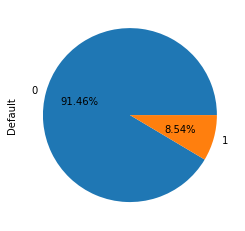

In [20]:
%%time
 #Check incidence rate for the defaults
 accepts.Default.value_counts(normalize=True).plot.pie(autopct="%1.2f%%")

In [21]:
%%time
# Here, we test the effect of dropping variables with high missing percentage (>20%)
na_threshold = 0.4

# Drop num variables with more than 30% missing values
num_na_pct = accepts.isnull().mean()
vars = num_na_pct[num_na_pct <= na_threshold].index.tolist()
print("Drop num variables with high missing pct:", num_na_pct[num_na_pct > na_threshold].tolist())

vars.remove('Default')

# Update data sets
accepts = accepts[vars + ['Default']]
rejects = rejects[vars]

Drop num variables with high missing pct: []
CPU times: total: 15.6 ms
Wall time: 20 ms


In [22]:
%%time
## Remove outliers
from scipy import stats

cols = ["family_count", "region_population_ratio", "days_phone_change"]

get_iqr = lambda x: {"lower":x.quantile(0.25) - 1.5 * stats.iqr(x), "upper":x.quantile(0.75) + 1.5 * stats.iqr(x)}

# compute iqr
iqr = accepts[cols].apply(get_iqr)

# remove outliers
for col, bounds in zip(cols, iqr):
    rows_before = accepts.shape[0]
    accepts = accepts[(accepts[col] < bounds["upper"]) & (bounds["lower"] < accepts[col])].reset_index(drop=True)
    print(f"{col}: removed {rows_before-accepts.shape[0]} rows ...")


family_count: removed 242 rows ...
region_population_ratio: removed 498 rows ...
days_phone_change: removed 18 rows ...
CPU times: total: 46.9 ms
Wall time: 43 ms


In [23]:
%%time
# Verify that all null values have been removed
accepts.isna().sum().sum()

CPU times: total: 15.6 ms
Wall time: 6 ms


0

-----------

##### Additional data exploration

CPU times: total: 93.8 ms
Wall time: 90 ms


Other                    5665
Laborers                 3281
Sales staff              1828
Core staff               1557
Managers                 1169
Drivers                  1091
High skill tech staff     633
Accountants               540
Medicine staff            476
Security staff            397
Cooking staff             356
Cleaning staff            256
Private service staff     144
Low-skill Laborers        137
Secretaries                80
Waiters/barmen staff       71
Realty agents              48
HR staff                   37
IT staff                   25
Name: occupation_type, dtype: int64

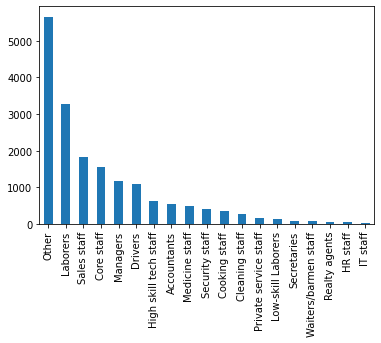

In [24]:
%%time
# number of applicants per job
accepts["occupation_type"].value_counts().plot(kind='bar')

accepts["occupation_type"].value_counts()

CPU times: total: 734 ms
Wall time: 376 ms


<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

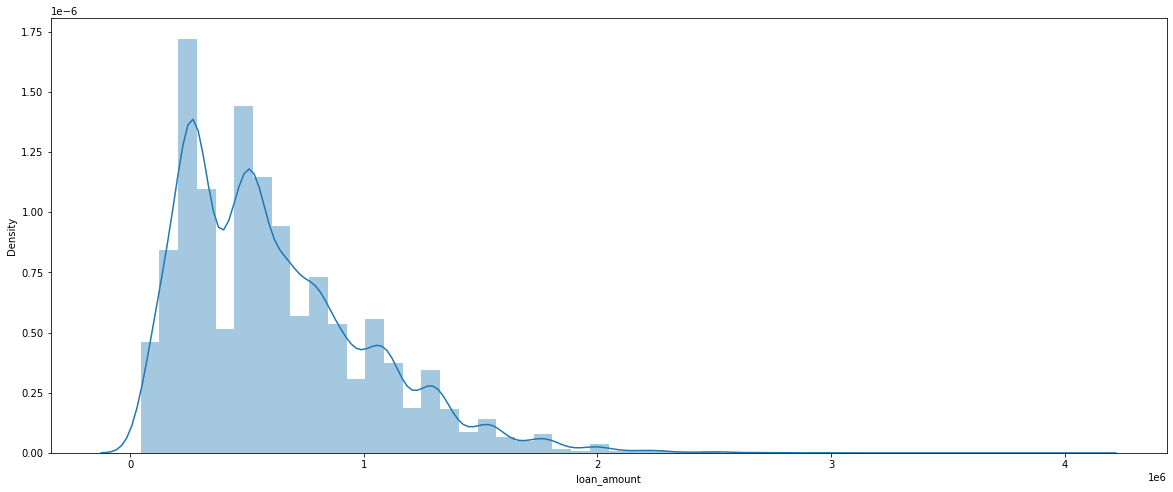

In [25]:
%%time
#Check the distribution of the loan amount
import shutup
shutup.please()
plt.figure(figsize=(20,8))
sns.distplot(accepts['loan_amount'])

CPU times: total: 922 ms
Wall time: 327 ms


<AxesSubplot:xlabel='total_income', ylabel='Density'>

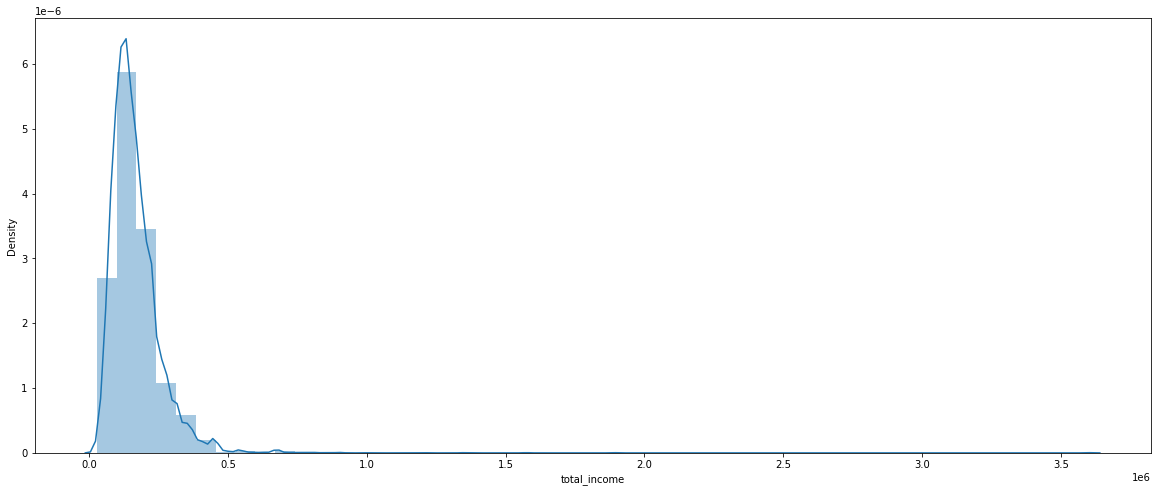

In [26]:
%%time
#Check the distribution of the total income
plt.figure(figsize=(20,8))
sns.distplot(accepts['total_income'])

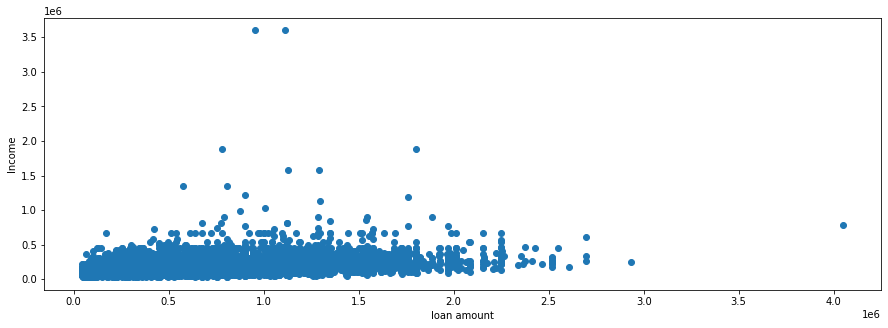

CPU times: total: 203 ms
Wall time: 214 ms


In [27]:
%%time
#Check the how income relates to the loan value
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(accepts['loan_amount'],accepts['total_income'])
ax.set_xlabel('loan amount')
ax.set_ylabel('Income')
plt.show()

------------

### 4) Cost Sensitive Information

In [28]:
%%time
accepts.head(3)

CPU times: total: 0 ns
Wall time: 996 µs


total_income  loan_amount  term  interest_rate  own_car  own_house  nr_children           income_type                 education_type   family_status housing_type  region_population_ratio  days_birth  days_employed  days_registration  phone_number  email  days_phone_change occupation_type  family_count      EXT2      EXT3  EXT4  EXT5  EXT6  EXT7  Default
0      157500.0     288562.5    30       3.737395        1          0            0  Commercial associate  Secondary / secondary special         Married    Apartment                 0.025164        33.0            1.0                3.0             0      0                0.0         Drivers           2.0  0.541308  0.236611     0     0     0     0        0
1       76500.0     225000.0    48       3.654300        0          1            3               Working  Secondary / secondary special       Separated  Co-op house                 0.028663        29.0            7.0                3.0             0      0            -2547.0        Laborers           4.0  0.395423  0.673830     0     1     0     0        0
2       67500.0     409653.0    12       3.262865        1          0            0               Working  Secondary / secondary special  Civil marriage        House                 0.035792        31.0            3.0               13.0             0      0            -1502.0        Laborers           2.0  0.649417  0.042929     0     1     0     0        1

In [29]:
%%time
# Select numeric columns
ncols = ['total_income', 'loan_amount', 'term', 'interest_rate', 'own_car', 'own_house', 'nr_children', 'region_population_ratio', 'days_birth', 'days_employed', 'days_registration', 'phone_number', 'email', 'days_phone_change', 'family_count', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'Default']


accept = accepts[ncols]

# drop missing values
accept = accept.dropna().reset_index(drop=True)

# train test split
X = accept[accept.columns[~accept.columns.isin(['Default'])]]
y = accept['Default']

#Split data in train (60%), test (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y, random_state=42)

#Split test in test (20%), validation (20%)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, stratify = y_test, random_state=42)

#Reset Index 
X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

CPU times: total: 62.5 ms
Wall time: 32 ms


##### Present value and future value are terms that are frequently used in annuity contracts. The present value of an annuity is the sum that must be invested now to guarantee a desired payment in the future, while its future value is the total that will be achieved over time.

In [30]:
%%time
# Define functions to calculate annuity, PV * FV
# Annuity
def A(am, ir_c, n):
    return am * (ir_c*(1+ir_c)**n) / ((1+ir_c)**n - 1)

# Present Value
def PV(A, ir_rf, n):
    return A * (1-1/((1+ir_rf)**n)) / ir_rf

# Future Value
def FV(am, ir, n):
    return am * (1+ir)**n

def cost_FP(am, n, ir_c, ir_rf=0.015):
    return PV(A(am,ir_c,n),ir_rf,n) - am

def cost_FN(am, lgd=0.75):
    return am*lgd    

CPU times: total: 0 ns
Wall time: 0 ns


In [31]:
%%time
# compute cost matrix
# transform months -> years

cm_train = pd.DataFrame()
cm_train["cFP"] = cost_FP(X_train["loan_amount"], X_train["term"]/12, X_train["interest_rate"]/100)
cm_train["cFN"] = cost_FN(X_train["loan_amount"])
cm_train["cTP"] = 0.0
cm_train["cTN"] = 0.0

cm_valid = pd.DataFrame()
cm_valid["cFP"] = cost_FP(X_valid["loan_amount"], X_valid["term"]/12, X_valid["interest_rate"]/100)
cm_valid["cFN"] = cost_FN(X_valid["loan_amount"])
cm_valid["cTP"] = 0.0
cm_valid["cTN"] = 0.0

cm_test = pd.DataFrame()
cm_test["cFP"] = cost_FP(X_test["loan_amount"], X_test["term"]/12, X_test["interest_rate"]/100)
cm_test["cFN"] = cost_FN(X_test["loan_amount"])
cm_test["cTP"] = 0.0
cm_test["cTN"] = 0.0

CPU times: total: 31.2 ms
Wall time: 34 ms


In [32]:
%%time
def total_cost(true, pred, cTP, cFN, cFP, cTN):
    return true*(pred*cTP+(1-pred)*cFN)+(1-true)*(pred*cFP+(1-pred)*cTN)

CPU times: total: 0 ns
Wall time: 0 ns


In [33]:
%%time
# Average cost
weights_avg_cost = {0:1, 1:np.mean(cm_train["cFN"] / cm_train["cFP"])}
print("Avg. cost:", weights_avg_cost)

# Inverse class distribution
c0, c1 = np.bincount(y_train)
weights_inv = {0:1,1:c0/c1}
print("Inv. class distribution:", weights_inv)

Avg. cost: {0: 1, 1: 30.948512476179058}
Inv. class distribution: {0: 1, 1: 10.551948051948052}
CPU times: total: 46.9 ms
Wall time: 2 ms


---------------

##### In this section we will find out the optimal threshold using modeling and optimizing the model parametres

What is Cost-Sensitive learning?
<br>
Whereas traditional classification models assume that all misclassification errors carry the same cost, cost-sensitive models consider costs that vary by type of classification and across samples.

Classification, in the context of machine learning, deals with the problem of predicting the class (y) of set of examples given their features (x)
• Minimize the misclassification

In the following image, we can consider Fraud = Default.

![](https://miro.medium.com/max/875/1*D6WxX1QSweIdkd_TuP6sqw.png)

In [34]:
%%time
# evaluation metrics
def eval_metrics(proba, true, cm, t=0.5):
    proba = np.asarray(proba)
    true = np.asarray(true, dtype=int)
    pred = np.array(proba > t, dtype=int) # probability threshold

    auc = roc_auc_score(true, proba)
    f1 = f1_score(true, pred)
    cost = np.sum(total_cost(true, pred, **cm))

    return {
        'AUC': auc,
        'F1': f1,
        "Cost": cost,
    }

CPU times: total: 0 ns
Wall time: 0 ns


In [35]:
%%time
#Setup Grid search for logistic regression model
logistic = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

models = {"logistic":logistic, "rf":rf}

# grid search values 
grid_values = {
                "logistic":{
                    "solver":["liblinear"],
                    'penalty': ['l1', 'l2'],
                    'C':[0.25, 0.5, 1, 3], 
                    "max_iter":[200,300],
                    "class_weight": ["balanced"] # can be extended to custom class weights
                },
                "rf":{
                    "max_depth":np.arange(2,11,1),
                    "class_weight": ["balanced"] # can be extended to custom class weights
                }
            }

CPU times: total: 0 ns
Wall time: 0 ns


In [36]:
%%time
def run_GridSearch(name, data, model, param_grid, **kwargs):
    # save results
    metrics = kwargs.get("metrics", defaultdict(dict))

    #grid search parameters in grid_values
    #scoring is based on roc_auc -> outcome of gs is best model from grid search
    gs = GridSearchCV(model, param_grid = param_grid, scoring = kwargs.get("scoring", 'roc_auc'), cv=kwargs.get("cv", 3), refit=kwargs.get("refit", True))
    gs.fit(data["X_train"], data["y_train"])
    
    # predict
    proba_train   = gs.predict_proba(data["X_train"])[:,1]
    proba_valid   = gs.predict_proba(data["X_valid"])[:,1]

    # evaluate
    metrics[name]["train"] = eval_metrics(proba_train,data["y_train"],data["cm_train"])
    metrics[name]["valid"] = eval_metrics(proba_valid,data["y_valid"],data["cm_valid"])

    # prints
    if kwargs.get("print", True):
        print(f"{name}: {gs.best_params_}")
        for key, val in metrics[name].items():
            print(f"{key}: ", "\t".join([f"{k}: {v:.4f}" for k,v in val.items()]))

        cmtx = pd.DataFrame(
        confusion_matrix(data["y_valid"], np.round(proba_valid)), 
        index=['true:no', 'true:yes'], 
        columns=['pred:no', 'pred:yes'])

        print(cmtx)
    
    return gs, metrics

CPU times: total: 0 ns
Wall time: 0 ns


In [37]:
%%time
data_temp = {
    "X_train":X_train,
    "y_train":y_train,
    "X_valid":X_valid,
    "y_valid":y_valid,
    "cm_train":cm_train,
    "cm_valid":cm_valid,
}

model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

logistic: {'C': 0.25, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.7346	F1: 0.2642	Cost: 214605317.1250
valid:  AUC: 0.7170	F1: 0.2538	Cost: 67693344.5194
          pred:no  pred:yes
true:no      2169      1082
true:yes      106       202
rf: {'class_weight': 'balanced', 'max_depth': 5}
train:  AUC: 0.7958	F1: 0.3148	Cost: 182525722.0290
valid:  AUC: 0.7191	F1: 0.2595	Cost: 70631418.3507
          pred:no  pred:yes
true:no      2298       953
true:yes      120       188
CPU times: total: 59.1 s
Wall time: 43.2 s


In [38]:
%%time
# save performance validation
EVAL = metric_dict.copy()

# evaluate on test set
# Note: I did not ask for this in the exercises
EVAL["logistic"]["test"] = eval_metrics(model_dict["logistic"].predict_proba(X_test)[:,1], y_test, cm_test)
EVAL["rf"]["test"] = eval_metrics(model_dict["rf"].predict_proba(X_test)[:,1], y_test, cm_test)

CPU times: total: 219 ms
Wall time: 95 ms


In [39]:
%%time
def tune_threshold(true, proba, cm):
    thresholds = np.arange(0, 1, 0.001)
    costs = [np.sum(total_cost(true, np.array(proba > t, dtype=int), **cm)) for t in thresholds]
    return thresholds, costs

CPU times: total: 0 ns
Wall time: 0 ns


In [40]:
%%time
# Logistic Regression

thresholds, costs = tune_threshold(y_train, model_dict["logistic"].predict_proba(X_train)[:,1], cm_train)

# best threshold
index = np.argmin(costs)
print(f"Threshold: {thresholds[index]:.3f}\tCost: {costs[index]:.0f}")

# evaluate cutoff on all data sets
EVAL["logistic+cutoff"]["train"] = eval_metrics(model_dict["logistic"].predict_proba(X_train)[:,1], y_train, cm_train, t=thresholds[np.argmin(costs)])
EVAL["logistic+cutoff"]["valid"] = eval_metrics(model_dict["logistic"].predict_proba(X_valid)[:,1], y_valid, cm_valid, t=thresholds[np.argmin(costs)])
EVAL["logistic+cutoff"]["test"] = eval_metrics(model_dict["logistic"].predict_proba(X_test)[:,1], y_test, cm_test, t=thresholds[np.argmin(costs)])
print(EVAL["logistic+cutoff"])

# Number of accepted applicants = pred:no = 78
cmtx = pd.DataFrame(
        confusion_matrix(y_valid, np.array(model_dict["logistic"].predict_proba(X_valid)[:,1] > thresholds[np.argmin(costs)], dtype=int)), 
        index=['true:no', 'true:yes'], 
        columns=['pred:no', 'pred:yes'])
print(cmtx)

Threshold: 0.339	Cost: 176707020
{'train': {'AUC': 0.7345978465978465, 'F1': 0.2118829746101302, 'Cost': 176707019.702667}, 'valid': {'AUC': 0.716998166398351, 'F1': 0.2062712504722327, 'Cost': 55553155.656565994}, 'test': {'AUC': 0.7476343656343656, 'F1': 0.2160278745644599, 'Cost': 51899673.070491016}}
          pred:no  pred:yes
true:no      1185      2066
true:yes       35       273
CPU times: total: 8.09 s
Wall time: 7.38 s


In [41]:
%%time
# Plot cost for all cutoffs
fig = go.Figure(data=go.Scatter(x=thresholds, y=costs))
fig.add_hline(y=np.min(costs), line_dash="dot", line_color="black")
fig.add_vline(x=thresholds[np.argmin(costs)], line_dash="dot", line_color="black")
fig.update_layout(
    title="Logistic Regression",
    xaxis_title="Threshold",
    yaxis_title="Cost"
)
fig.show()

CPU times: total: 78.1 ms
Wall time: 130 ms


In [42]:
%%time
# Random Forest 

thresholds, costs = tune_threshold(y_train, model_dict["rf"].predict_proba(X_train)[:,1], cm_train)

# best threshold
index = np.argmin(costs)
print(f"Threshold: {thresholds[index]:.3f}\tCost: {costs[index]:.0f}")

# evaluate cutoff on all data sets
EVAL["rf+cutoff"]["train"] = eval_metrics(model_dict["rf"].predict_proba(X_train)[:,1], y_train, cm_train, t=thresholds[np.argmin(costs)])
EVAL["rf+cutoff"]["valid"] = eval_metrics(model_dict["rf"].predict_proba(X_valid)[:,1], y_valid, cm_valid, t=thresholds[np.argmin(costs)])
EVAL["rf+cutoff"]["test"] = eval_metrics(model_dict["rf"].predict_proba(X_test)[:,1], y_test, cm_test, t=thresholds[np.argmin(costs)])
print(EVAL["rf+cutoff"])

# Number of accepted applicants = pred:no = 1394
cmtx = pd.DataFrame(
        confusion_matrix(y_valid, np.array(model_dict["rf"].predict_proba(X_valid)[:,1] > thresholds[np.argmin(costs)], dtype=int)), 
        index=['true:no', 'true:yes'], 
        columns=['pred:no', 'pred:yes'])
print(cmtx)

Threshold: 0.408	Cost: 145436861
{'train': {'AUC': 0.7958479298479298, 'F1': 0.24715110256030778, 'Cost': 145436861.45386422}, 'valid': {'AUC': 0.719098419267598, 'F1': 0.21972318339100344, 'Cost': 56441297.65287554}, 'test': {'AUC': 0.7505434565434567, 'F1': 0.2315421581476627, 'Cost': 51838465.73902561}}
          pred:no  pred:yes
true:no      1501      1750
true:yes       54       254
CPU times: total: 9.02 s
Wall time: 8.03 s


In [43]:
%%time
# Plot cost for all cutoffs
fig = go.Figure(data=go.Scatter(x=thresholds, y=costs))
fig.add_hline(y=np.min(costs), line_dash="dot", line_color="black")
fig.add_vline(x=thresholds[np.argmin(costs)], line_dash="dot", line_color="black")
fig.update_layout(
    title="Random Forest",
    xaxis_title="Threshold",
    yaxis_title="Cost"
)
fig.show()

CPU times: total: 46.9 ms
Wall time: 67 ms


In [44]:
%%time
# setup sampling techniques

# SMOTE
sample_over = SMOTE(random_state=42)
X_train_over, y_train_over = sample_over.fit_resample(X_train, y_train)

# RandomUnderSampler
sample_under = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = sample_under.fit_resample(X_train, y_train)

print(f"SMOTE: {np.bincount(y_train_over)}")
print(f"Random Undersampling: {np.bincount(y_train_under)}")

SMOTE: [9750 9750]
Random Undersampling: [924 924]
CPU times: total: 156 ms
Wall time: 117 ms


In [45]:
%%time
# compute new cost matrix
cm_train_over = pd.DataFrame()
cm_train_over["cFP"] = cost_FP(X_train_over["loan_amount"], X_train_over["term"]/12, X_train_over["total_income"]/100)
cm_train_over["cFN"] = cost_FN(X_train_over["loan_amount"])
cm_train_over["cTP"] = 0.0
cm_train_over["cTN"] = 0.0

data_temp = {
    "X_train":X_train_over,
    "y_train":y_train_over,
    "X_valid":X_valid,
    "y_valid":y_valid,
    "cm_train":cm_train_over,
    "cm_valid":cm_valid,
}

model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)
    EVAL[name+"+over"]["train"] = eval_metrics(model_dict[name].predict_proba(X_train)[:,1], y_train, cm_train)
    EVAL[name+"+over"]["valid"] = eval_metrics(model_dict[name].predict_proba(X_valid)[:,1], y_valid, cm_valid)
    EVAL[name+"+over"]["test"] = eval_metrics(model_dict[name].predict_proba(X_test)[:,1], y_test, cm_test)

logistic: {'C': 3, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.8557	F1: 0.7795	Cost: 7405769050481.8525
valid:  AUC: 0.6350	F1: 0.2175	Cost: 90997584.9722
          pred:no  pred:yes
true:no      2477       774
true:yes      176       132
rf: {'class_weight': 'balanced', 'max_depth': 10}
train:  AUC: 0.9731	F1: 0.9181	Cost: 2945948372611.1919
valid:  AUC: 0.6496	F1: 0.1931	Cost: 104658669.6705
          pred:no  pred:yes
true:no      2829       422
true:yes      230        78
CPU times: total: 1min 14s
Wall time: 1min 10s


In [46]:
%%time
# compute new cost matrix
cm_train_under = pd.DataFrame()
cm_train_under["cFP"] = cost_FP(X_train_under["loan_amount"], X_train_under["term"]/12, X_train_under["interest_rate"]/100)
cm_train_under["cFN"] = cost_FN(X_train_under["loan_amount"])
cm_train_under["cTP"] = 0.0
cm_train_under["cTN"] = 0.0

data_temp = {
    "X_train":X_train_under,
    "y_train":y_train_under,
    "X_valid":X_valid,
    "y_valid":y_valid,
    "cm_train":cm_train_under,
    "cm_valid":cm_valid,
}

model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)
    EVAL[name+"+under"]["train"] = eval_metrics(model_dict[name].predict_proba(X_train)[:,1], y_train, cm_train)
    EVAL[name+"+under"]["valid"] = eval_metrics(model_dict[name].predict_proba(X_valid)[:,1], y_valid, cm_valid)
    EVAL[name+"+under"]["test"] = eval_metrics(model_dict[name].predict_proba(X_test)[:,1], y_test, cm_test)

logistic: {'C': 3, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.7409	F1: 0.6663	Cost: 160887085.3198
valid:  AUC: 0.7127	F1: 0.2438	Cost: 71141907.5614
          pred:no  pred:yes
true:no      2140      1111
true:yes      111       197
rf: {'class_weight': 'balanced', 'max_depth': 4}
train:  AUC: 0.8003	F1: 0.7310	Cost: 125553818.5990
valid:  AUC: 0.7159	F1: 0.2447	Cost: 68159331.1687
          pred:no  pred:yes
true:no      2060      1191
true:yes       99       209
CPU times: total: 9.25 s
Wall time: 8.93 s


In [47]:
%%time
# Display full overview
overview = pd.DataFrame(pd.concat({k: pd.DataFrame(v) for k,v in EVAL.items()}, axis=1)).T

# convert cost to million
overview["Cost"] /= 1_000_000

overview

CPU times: total: 15.6 ms
Wall time: 11 ms


AUC        F1        Cost
logistic        train  0.734598  0.264209  214.605317
                valid  0.716998  0.253769   67.693345
                test   0.747634  0.278890   56.902562
rf              train  0.795848  0.314770  182.525722
                valid  0.719098  0.259489   70.631418
                test   0.750543  0.284083   62.057720
logistic+cutoff train  0.734598  0.211883  176.707020
                valid  0.716998  0.206271   55.553156
                test   0.747634  0.216028   51.899673
rf+cutoff       train  0.795848  0.247151  145.436861
                valid  0.719098  0.219723   56.441298
                test   0.750543  0.231542   51.838466
logistic+over   train  0.658233  0.228137  272.503853
                valid  0.635039  0.217463   90.997585
                test   0.665733  0.235974   81.058048
rf+over         train  0.880482  0.418546  201.585063
                valid  0.649618  0.193069  104.658670
                test   0.688880  0.219608   92.135686
logistic+under  train  0.731394  0.261731  213.421057
                valid  0.712679  0.243812   71.141908
                test   0.742245  0.268991   57.033321
rf+under        train  0.767466  0.280309  180.235474
                valid  0.715859  0.244731   68.159331
                test   0.746860  0.267614   56.427355

In [48]:
%%time
# LR + cutoff tuning performs best on cost metric
overview.iloc[overview.index.get_level_values(1) == "test",:].sort_values("Cost", ascending=True)

CPU times: total: 0 ns
Wall time: 995 µs


AUC        F1       Cost
rf+cutoff       test  0.750543  0.231542  51.838466
logistic+cutoff test  0.747634  0.216028  51.899673
rf+under        test  0.746860  0.267614  56.427355
logistic        test  0.747634  0.278890  56.902562
logistic+under  test  0.742245  0.268991  57.033321
rf              test  0.750543  0.284083  62.057720
logistic+over   test  0.665733  0.235974  81.058048
rf+over         test  0.688880  0.219608  92.135686

- ### As we can see from the above table, the Logistic Regression model with the cutoff is the best for the business in terms of cost. Hence, we will use it to build the scorecard

In [49]:
%%time
#Tune model & Plot the performance
data_temp = {
    "X_train":X_train,
    "y_train":y_train,
    "X_valid":X_valid,
    "y_valid":y_valid,
    "cm_train":cm_train,
    "cm_valid":cm_valid,
}

name = "logistic"
best_model, metrics = run_GridSearch(name=name, data=data_temp, model=models[name], param_grid=grid_values[name], print=False)

thresholds, costs_train = tune_threshold(y_train, best_model.predict_proba(X_train)[:,1], cm_train)
_, costs_test = tune_threshold(y_test, best_model.predict_proba(X_test)[:,1], cm_test)


# Display selected cutoff and true costs
fig = go.Figure(data=go.Scatter(x=thresholds, y=costs_test))
fig.add_vline(x=thresholds[np.argmin(costs_train)], line_dash="dot", line_color="black")
fig.update_layout(
    title="LR+Cutoff",
    xaxis_title="Threshold",
    yaxis_title="Cost"
)
fig.show()

CPU times: total: 41.8 s
Wall time: 18.9 s


In [50]:
%%time
#Get the parametres & cutoff of the best model
print("Best Model: ", best_model.best_estimator_,' at ',"Threshold:", thresholds[np.argmin(costs_train)])

Best Model:  LogisticRegression(C=0.25, class_weight='balanced', max_iter=200, penalty='l1',
                   random_state=42, solver='liblinear')  at  Threshold: 0.339
CPU times: total: 46.9 ms
Wall time: 9 ms


---------------------------

### 5) Reject Inference

The main purpose to perform the reject inference is that the historical data of loan defaults only contains accepted applicants and using only accepted data:
- Introduces bias to our new model
- Possible source of bias in historical data:
- Employees rejecting loan applicants due to internal biases
- Bank operated in a limited geographical area
- …

This meathodology follows the assumption: Not all rejected applicants default.

In this project we follow the Predict default probability, in this approach, we use the accept dataset to train and evaluate a model with target variable as the probability of default.
We then predict the probabilities of default on the loan reject dataset and fina
lly merge both of the accept and reject dataset to geather.

- Cutoff approach: 75% rejects default
- Predicted label: Label based on biased prediction

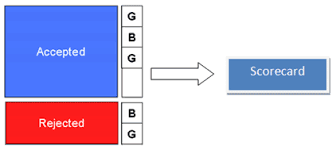

--------

In [51]:
%%time
# train test split from accepts dataset
X = accepts[accepts.columns[~accepts.columns.isin(['Default'])]]
y = accepts['Default']

#Split data in train (80%), test (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y, random_state=42)

#Split test in test (20%), validation (20%)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, stratify = y_test, random_state=42)

#Reset Index 
X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = np.array(y_train)
y_valid = np.array(y_valid)
y_test = np.array(y_test)

CPU times: total: 31.2 ms
Wall time: 33 ms


In [52]:
%%time
# Check the Class distribution
labels = ["Default - 0", "Default - 1"]
values = np.bincount(y_train)

print(X_train.shape, y_train.shape)
print(np.bincount(y_train))

donut = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5, marker_colors=["rgb(153, 214, 255)", "rgb(0, 92, 153)"])])
donut.show()

(10674, 26) (10674,)
[9750  924]


CPU times: total: 31.2 ms
Wall time: 45 ms


In [53]:
%%time
#Prep for modeling
# evaluation metrics
def eval_metrics(proba, true):
    proba   = np.asarray(proba)
    true  = np.asarray(true, dtype=int)
    pred    = np.round(proba) # convert proba to binary labels

    auc         = roc_auc_score(true, proba)
    f1          = f1_score(true, pred)

    return {
        'AUC': auc,
        'F1': f1,
    }

def run_GridSearch(name, data, model, param_grid, **kwargs):
    # save results
    metrics = kwargs.get("metrics", defaultdict(dict))

    #grid search parameters in grid_values
    #scoring is based on roc_auc -> outcome of gs is best model from grid search
    gs = GridSearchCV(model, param_grid = param_grid, scoring = kwargs.get("scoring", 'roc_auc'), cv=kwargs.get("cv", 3), refit=kwargs.get("refit", True))
    gs.fit(data["X_train"], data["y_train"])
    
    # predict
    proba_train   = gs.predict_proba(data["X_train"])[:,1]
    proba_valid   = gs.predict_proba(data["X_valid"])[:,1]

    # evaluate
    metrics[name]["train"] = eval_metrics(proba_train,data["y_train"])
    metrics[name]["valid"] = eval_metrics(proba_valid,data["y_valid"])

    # prints
    if kwargs.get("print", True):
        print(f"{name}: {gs.best_params_}")
        for key, val in metrics[name].items():
            print(f"{key}: ", "\t".join([f"{k}: {v:.4f}" for k,v in val.items()]))

        cmtx = pd.DataFrame(
        confusion_matrix(data["y_valid"], np.round(proba_valid)), 
        index=['true:no', 'true:yes'], 
        columns=['pred:no', 'pred:yes'])

        print(cmtx)
    
    return gs, metrics

CPU times: total: 0 ns
Wall time: 0 ns


In [54]:
%%time
# prepare the train and test data
ac = X_train
ac['Default'] = y_train

#split in train and test
TM, VM = train_test_split(ac, test_size=.2, stratify = ac.Default, random_state=42)

CPU times: total: 15.6 ms
Wall time: 12 ms


In [55]:
%%time
#Select numeric columns (We will use remaining columsn later after bining and applying WoE)
cols1 = ['total_income', 'loan_amount', 'term', 'interest_rate', 'nr_children',  'region_population_ratio', 'days_birth', 'days_employed',
 'days_registration', 'phone_number', 'email', 'days_phone_change', 'family_count', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7']

TM_X = TM[cols1]
TM_y = TM['Default']


VM_X = VM[cols1]
VM_y = VM['Default']

CPU times: total: 15.6 ms
Wall time: 4.99 ms


In [56]:
%%time
#Initialize the model
#lm =  LogisticRegression(solver='liblinear', max_iter=500, C=1, penalty='l1', class_weight='balanced')
lm = LogisticRegression(C=0.25, class_weight='balanced', max_iter=200, penalty='l1', random_state=42, solver='liblinear')
#Fit the model
lm.fit(TM_X, TM_y)
#Predict on yesy
pred = lm.predict_proba(VM_X)
#Check Performance on Test
print("Test AUC Score: ", roc_auc_score(VM_y, pd.DataFrame(pred)[1]))

#Set proba threshold based on the incident rate
thres =  .16
#Convert from proba to 0 and 1
preds = np.where(pd.DataFrame(pred)[1]>thres, 1,0)
#check F1 Score
print("Test F1 Score: ", f1_score(VM_y, preds))
print("---------------------------------")
print("---------Confusion Matrix--------")
print("---------------------------------")
print(" ", confusion_matrix(VM_y, preds))

Test AUC Score:  0.7255634095634096
Test F1 Score:  0.16412556053811658
---------------------------------
---------Confusion Matrix--------
---------------------------------
  [[  88 1862]
 [   2  183]]
CPU times: total: 328 ms
Wall time: 325 ms


In [57]:
%%time
#Incoporate default predictions of reject in reject dataset
pred_rej = lm.predict_proba(rejects[cols1])
#Convert probabilities to 0 and 1
rj_pred = np.where(pd.DataFrame(pred_rej)[1]>thres, 1,0)
#Add default column to dataframe
rejects['Default'] = rj_pred

CPU times: total: 62.5 ms
Wall time: 11 ms


#### Finding the optimal cutoff threshold

In [58]:
%%time
#Setup Grid search for logistic regression model
logistic = LogisticRegression()

models = {"logistic":logistic}

# grid search values 
grid_values = {
                "logistic":{
                    "solver":["liblinear"],
                    'penalty': ['l1', 'l2'],
                    'C':[0.5, 1, 3, 4, 5], 
                    "max_iter":[200,300, 500],
                    "class_weight": ["balanced"]
                }
            }

CPU times: total: 0 ns
Wall time: 0 ns


In [59]:
%%time
#select columns
cols1 = ['total_income', 'loan_amount', 'term', 'interest_rate', 'nr_children',  'region_population_ratio', 'days_birth', 'days_employed', 'days_registration', 'phone_number', 'email', 'days_phone_change', 'family_count', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7']


# Incorporate labelled rejects with accepts

X_3 = pd.concat([X_train, rejects], axis=0)
y_3 = np.append(y_train, np.round(pd.DataFrame(pred_rej)[1]))

data_temp = {
    "X_train":X_3[cols1],
    "y_train":y_3,
    "X_valid":X_valid[cols1],
    "y_valid":y_valid,
}

CPU times: total: 93.8 ms
Wall time: 31 ms


In [60]:
%%time
model_dict = defaultdict(dict)
metric_dict = defaultdict(dict)

#loop through models in models dictionary
for name, model in models.items():
    model_dict[name], metric_dict = run_GridSearch(name=name, data=data_temp, model=model, param_grid=grid_values[name], metrics=metric_dict)

logistic: {'C': 5, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
train:  AUC: 0.8837	F1: 0.6977
valid:  AUC: 0.7132	F1: 0.2488
          pred:no  pred:yes
true:no      2257       994
true:yes      123       185
CPU times: total: 1min 10s
Wall time: 31.4 s


In [61]:
%%time
# Refit selected model
model1 = LogisticRegression(**model_dict["logistic"].best_params_)
model1.fit(X_3[cols1], y_3)

# Display Model Coefficients
fig = go.Figure([
    go.Bar(y=X_train.columns, x=model1.coef_[0], text=np.round(model1.coef_[0], 2), orientation='h')
    ])

fig.update_traces(textposition='outside', marker_color='rgb(0, 92, 153)')
fig.update_layout(title='Logistic Regression Coefficients',
                  dragmode='select',
                  width=700,
                  height=400,
                  hovermode='closest')
fig.show()

CPU times: total: 906 ms
Wall time: 912 ms


In [62]:
%%time
# get probabilities
pred_train = pd.DataFrame(model1.predict_proba(X_train[cols1]))[1]
pred_reject = pd.DataFrame(model1.predict_proba(rejects[cols1]))[1]

# display probability distribution
fig = go.Figure()
fig.add_trace(go.Histogram(x=pred_train, name='train'))
fig.add_trace(go.Histogram(x=pred_reject, name='reject'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.7)
fig.show()

CPU times: total: 312 ms
Wall time: 178 ms


In [63]:
%%time
# Label rejects based on cutoff

# Define 34% cutoff
cutoff_34 = int(len(pred_reject) * 0.34)

# Compute cutoff value
cutoff_value = np.max(np.sort(pred_reject)[:cutoff_34])
print("Cutoff probability: {:.3f}%".format(cutoff_value*100))

# Assign "Default" value to rejected loan applicants
y_reject = np.array(pred_reject > cutoff_value, dtype=int)

Cutoff probability: 15.983%
CPU times: total: 0 ns
Wall time: 2 ms


In [64]:
%%time
# Incorporate labelled rejects with accepts
# Concatenating both the datasets (in order to avois bias as discussed under Rejection Inference Method above) 
Final_DS = pd.concat([accepts, rejects])

CPU times: total: 15.6 ms
Wall time: 14 ms


In [65]:
%%time
cols = list(Final_DS.columns)

bin_cols = ['total_income','income_type', 'education_type', 'family_status', 'housing_type', 'occupation_type']
features = list(bin_cols + ['Default'])

CPU times: total: 0 ns
Wall time: 1 ms


In [66]:
%%time
Final_DS.head(2)

CPU times: total: 0 ns
Wall time: 0 ns


total_income  loan_amount  term  interest_rate  own_car  own_house  nr_children           income_type                 education_type family_status housing_type  region_population_ratio  days_birth  days_employed  days_registration  phone_number  email  days_phone_change occupation_type  family_count      EXT2      EXT3  EXT4  EXT5  EXT6  EXT7  Default
0      157500.0     288562.5    30       3.737395        1          0            0  Commercial associate  Secondary / secondary special       Married    Apartment                 0.025164        33.0            1.0                3.0             0      0                0.0         Drivers           2.0  0.541308  0.236611     0     0     0     0        0
1       76500.0     225000.0    48       3.654300        0          1            3               Working  Secondary / secondary special     Separated  Co-op house                 0.028663        29.0            7.0                3.0             0      0            -2547.0        Laborers           4.0  0.395423  0.673830     0     1     0     0        0

----------------------

### 6) Scorecard

In [67]:
%%time
from Binning import data_bin, data_vars, mono_bin

CPU times: total: 15.6 ms
Wall time: 7 ms


In [68]:
%%time
## Reference https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb
# This function create a new dataframe with all the steps to calculate the woe and also the IV
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 5
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

# Function to map each WoE value to the Train, Test and Rejects
def transf(df):
    for var in transform_vars_list:
        small_df = final_iv[final_iv['VAR_NAME'] == var]
        transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
        replace_cmd = ''
        replace_cmd1 = ''
        for i in sorted(transform_dict.items()):
            replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
            replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
        replace_cmd = replace_cmd + '0'
        replace_cmd1 = replace_cmd1 + '0'
        if replace_cmd != '0':
            try:
                df[var] = df[var].apply(lambda x: eval(replace_cmd))
            except:
                df[var] = df[var].apply(lambda x: eval(replace_cmd1))
    return df


CPU times: total: 0 ns
Wall time: 0 ns


In [69]:
#Get the IV score values based on WoE
final_iv, IV = data_vars(Final_DS[cols],Final_DS['Default'])

c:\tools\Anaconda3\envs\pytorch\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log

c:\tools\Anaconda3\envs\pytorch\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning:

divide by zero encountered in log



In [70]:
%%time
#Check sample data
final_iv.head()

CPU times: total: 0 ns
Wall time: 0 ns


VAR_NAME MIN_VALUE  MAX_VALUE  COUNT  EVENT  EVENT_RATE  NONEVENT  NON_EVENT_RATE  DIST_EVENT  DIST_NON_EVENT       WOE        IV
0  total_income   26550.0   148500.0  13572   5214    0.384173      8358        0.615827    0.506558        0.503191  0.006669  0.000045
1  total_income  150691.5  3600000.0  13331   5079    0.380992      8252        0.619008    0.493442        0.496809 -0.006800  0.000045
2   loan_amount   45000.0   537669.0  13452   5208    0.387154      8244        0.612846    0.505975        0.496328  0.019251  0.000372
3   loan_amount  537763.5  4050000.0  13451   5085    0.378039      8366        0.621961    0.494025        0.503672 -0.019340  0.000372
4          term      12.0       24.0  11690   4499    0.384859      7191        0.615141    0.437093        0.432932  0.009566  0.000083

In [71]:
%%time
#Sort values by IV
IV.sort_values('IV')

CPU times: total: 0 ns
Wall time: 1 ms


VAR_NAME            IV
5                      EXT7  8.406727e-10
4                      EXT6  3.624715e-09
2                      EXT4  1.768283e-05
25             total_income  4.535140e-05
24                     term  8.332536e-05
11                    email  2.356685e-04
17              loan_amount  3.723044e-04
21                own_house  4.171084e-04
7             days_employed  5.565389e-04
20                  own_car  8.906118e-04
23  region_population_ratio  1.070924e-03
16            interest_rate  1.879249e-03
12             family_count  1.977800e-03
18              nr_children  2.082900e-03
10           education_type  3.920486e-03
13            family_status  4.034405e-03
22             phone_number  4.714628e-03
14             housing_type  4.945417e-03
8         days_phone_change  7.954066e-03
9         days_registration  1.209017e-02
3                      EXT5  1.401569e-02
19          occupation_type  1.964340e-02
15              income_type  2.462322e-02
6                days_birth  2.672145e-02
0                      EXT2  5.805890e-02
1                      EXT3  5.958142e-02

In [72]:
%%time
#prep to merge back with the dataset to understand the scorecard
transform_vars_list = Final_DS.columns.difference(['target'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

CPU times: total: 15.6 ms
Wall time: 839 µs


In [73]:
%%time
#merge back with the dataset to understand the scorecard
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            Final_DS[transform_prefix + var] = Final_DS[var].apply(lambda x: eval(replace_cmd))
        except:
            Final_DS[transform_prefix + var] = Final_DS[var].apply(lambda x: eval(replace_cmd1))

CPU times: total: 30.7 s
Wall time: 31.6 s


In [74]:
%%time
#Look at some of the variable distributions to verify the merge and the function is ok
Final_DS['income_type'].value_counts()

CPU times: total: 0 ns
Wall time: 4 ms


Working                 14241
Commercial associate     5850
Pensioner                4885
State servant            1925
Unemployed                  1
Student                     1
Name: income_type, dtype: int64

In [75]:
%%time
Final_DS['new_income_type'].value_counts()

CPU times: total: 0 ns
Wall time: 2 ms


 0.104752    14241
 0.033743     5850
-0.318088     4885
-0.114907     1925
 0.000000        2
Name: new_income_type, dtype: int64

--------------

In [76]:
%%time
Final_DS.head(3)

CPU times: total: 0 ns
Wall time: 0 ns


total_income  loan_amount  term  interest_rate  own_car  own_house  nr_children           income_type                 education_type   family_status housing_type  region_population_ratio  days_birth  days_employed  days_registration  phone_number  email  days_phone_change occupation_type  family_count      EXT2      EXT3  EXT4  EXT5  EXT6  EXT7  Default  new_EXT2  new_EXT3  new_EXT4  new_EXT5  new_EXT6  new_EXT7  new_days_birth  new_days_employed  new_days_phone_change  new_days_registration  new_education_type  new_email  new_family_count  new_family_status  new_housing_type  new_income_type  new_interest_rate  new_loan_amount  new_nr_children  new_occupation_type  new_own_car  new_own_house  new_phone_number  new_region_population_ratio  new_term  new_total_income
0      157500.0     288562.5    30       3.737395        1          0            0  Commercial associate  Secondary / secondary special         Married    Apartment                 0.025164        33.0            1.0                3.0             0      0                0.0         Drivers           2.0  0.541308  0.236611     0     0     0     0        0  0.045493  0.329967 -0.000037 -0.234030   0.00006 -0.000004        0.169532           0.022870               0.078091               0.111485            0.029228  -0.003814         -0.026288          -0.028204         -0.014496         0.033743           0.010083         0.019251        -0.014534             0.165857    -0.041827       0.029898          0.041849                    -0.005292 -0.003400         -0.006800
1       76500.0     225000.0    48       3.654300        0          1            3               Working  Secondary / secondary special       Separated  Co-op house                 0.028663        29.0            7.0                3.0             0      0            -2547.0        Laborers           4.0  0.395423  0.673830     0     1     0     0        0  0.045493 -0.350855 -0.000037  0.059959   0.00006 -0.000004        0.169532          -0.024336              -0.126103               0.111485            0.029228  -0.003814          0.075247          -0.030778         -0.017198         0.104752           0.010083         0.019251         0.143334             0.126328     0.021294      -0.013952          0.041849                    -0.052883 -0.013111          0.006669
2       67500.0     409653.0    12       3.262865        1          0            0               Working  Secondary / secondary special  Civil marriage        House                 0.035792        31.0            3.0               13.0             0      0            -1502.0        Laborers           2.0  0.649417  0.042929     0     1     0     0        1 -0.093186  0.329967 -0.000037  0.059959   0.00006 -0.000004        0.169532           0.022870              -0.126103               0.019783            0.029228  -0.003814         -0.026288           0.090181         -0.027143         0.104752           0.002928         0.019251        -0.014534             0.126328    -0.041827       0.029898          0.041849                    -0.052883  0.009566          0.006669

In [77]:
%%time
# Applying the WOE in the merged dataset
transform_vars_list = Final_DS.columns
transform_prefix = 'new_'

CPU times: total: 0 ns
Wall time: 0 ns


CPU times: total: 78.1 ms
Wall time: 80 ms


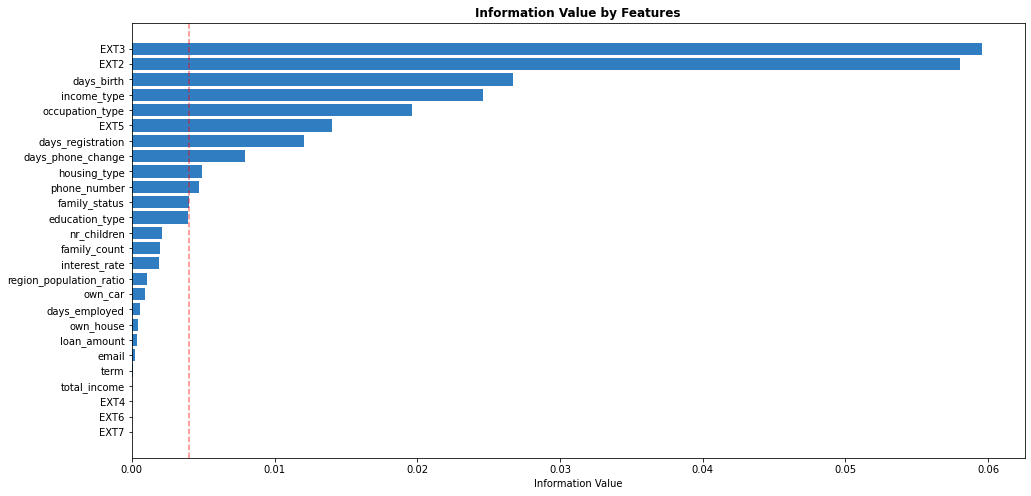

In [78]:
%%time
# Ploting the Information Value of each variable

# Sorting
IV.sort_values('IV', ascending=True, inplace=True)

# Plot IV
plt.figure(figsize=(16,8))
plt.barh(IV['VAR_NAME'], IV['IV'], color = '#317DC2')
plt.xlabel('Information Value')
plt.title('Information Value by Features', fontweight="bold")
plt.axvline(0.004, color='red', linestyle='dashed', linewidth=1.5, alpha=0.5);

In [79]:
%%time
# Extracting the name of the variables with a predictive power less than 0.02. Those will be drop
x = IV[IV['IV'] <0.004]
feat_selec = x.iloc[:,0].tolist()

CPU times: total: 0 ns
Wall time: 2 ms


In [80]:
%%time
# Dropping the variables flagged previously 
Final_DS1 = Final_DS.drop(columns=feat_selec)

CPU times: total: 15.6 ms
Wall time: 16 ms


In [81]:
%%time
# Deleting the variables that were dropped from the final_iv that hold the WoE and all the steps to get there.
for i in feat_selec:
    final_iv = final_iv[final_iv['VAR_NAME'] != i]

CPU times: total: 15.6 ms
Wall time: 20 ms


In [82]:
%%time
import sqldf
sqldf.run(""" SELECT VAR_NAME as Characteristic, MAX_VALUE as Attribute, max(WOE) as MaxWOE 
                    FROM final_iv 
                    GROUP BY VAR_NAME
           
        """)

CPU times: total: 31.2 ms
Wall time: 23 ms


Characteristic             Attribute    MaxWOE
0                EXT2     0.374463514121892  0.343934
1                EXT3       0.4048783643354  0.329967
2                EXT5                     1  0.059959
3          days_birth                  34.0  0.169532
4   days_phone_change                   0.0  0.078091
5   days_registration                   5.0  0.111485
6       family_status  Single / not married  0.114156
7        housing_type      Rented apartment  0.284077
8         income_type               Working  0.104752
9     occupation_type  Waiters/barmen staff  0.461446
10       phone_number                     0  0.041849

-------------------

In [83]:
%%time
# Apply WOE binning to the "income_type" variable
income_woe = WOE.WOEEncoder(pred_var="income_type", target_var="Default" )
Final_DS_W = income_woe.fit_transform(Final_DS, stop_limit=0.05)


# Apply WOE binning to the "education_type" variable
education_type_woe = WOE.WOEEncoder(pred_var="education_type", target_var="Default")
Final_DS_W = education_type_woe.fit_transform(Final_DS_W, stop_limit=0.05)

# Apply WOE binning to the "family_status" variable
family_status_woe = WOE.WOEEncoder(pred_var="family_status", target_var="Default")
Final_DS_W = family_status_woe.fit_transform(Final_DS_W, stop_limit=0.05)

# Apply WOE binning to the "housing_type" variable
housing_type_woe = WOE.WOEEncoder(pred_var="housing_type", target_var="Default")
Final_DS_W = housing_type_woe.fit_transform(Final_DS_W, stop_limit=0.05)

# Apply WOE binning to the "occupation_type" variable
occupation_type_woe = WOE.WOEEncoder(pred_var="occupation_type", target_var="Default")
Final_DS_W = occupation_type_woe.fit_transform(Final_DS_W, stop_limit=0.05)

Fitted 4 bins for 'income_type' (levels=6)...
Fitted 3 bins for 'education_type' (levels=5)...
Fitted 4 bins for 'family_status' (levels=5)...
Fitted 3 bins for 'housing_type' (levels=10)...
Fitted 3 bins for 'occupation_type' (levels=19)...
CPU times: total: 3.88 s
Wall time: 4.02 s


In [84]:
#income_woe.fit_dict

In [85]:
%%time
from category_encoders import WOEEncoder

# copy df
df_cleaned = Final_DS_W.copy()

# WOE encode JOB and CLAGE
cols_to_bin = ['total_income','income_type', 'education_type', 'housing_type','occupation_type','total_income','nr_children','days_employed','days_birth','family_count', 'family_status']
ce_woe = WOEEncoder()
df_cleaned[cols_to_bin] = ce_woe.fit_transform(X=df_cleaned[cols_to_bin], y=df_cleaned["Default"])


CPU times: total: 953 ms
Wall time: 1.41 s


In [86]:
# %%time
# df_cleaned[cols_to_bin].head(2)

In [87]:
%%time
df_cleaned.head(2)

CPU times: total: 0 ns
Wall time: 0 ns


total_income  loan_amount  term  interest_rate  own_car  own_house  nr_children  income_type  education_type  family_status  housing_type  region_population_ratio  days_birth  days_employed  days_registration  phone_number  email  days_phone_change  occupation_type  family_count      EXT2      EXT3  EXT4  EXT5  EXT6  EXT7  Default  new_EXT2  new_EXT3  new_EXT4  new_EXT5  new_EXT6  new_EXT7  new_days_birth  new_days_employed  new_days_phone_change  new_days_registration  new_education_type  new_email  new_family_count  new_family_status  new_housing_type  new_income_type  new_interest_rate  new_loan_amount  new_nr_children  new_occupation_type  new_own_car  new_own_house  new_phone_number  new_region_population_ratio  new_term  new_total_income
0      157500.0     288562.5    30       3.737395        1          0            0     0.067094        0.031499      -0.028463     -0.019387                 0.025164        33.0            1.0                3.0             0      0                0.0         0.131784           2.0  0.541308  0.236611     0     0     0     0        0  0.045493  0.329967 -0.000037 -0.234030   0.00006 -0.000004        0.169532           0.022870               0.078091               0.111485            0.029228  -0.003814         -0.026288          -0.028204         -0.014496         0.033743           0.010083         0.019251        -0.014534             0.165857    -0.041827       0.029898          0.041849                    -0.005292 -0.003400         -0.006800
1       76500.0     225000.0    48       3.654300        0          1            3     0.067094        0.031499      -0.028463     -0.019387                 0.028663        29.0            7.0                3.0             0      0            -2547.0         0.131784           4.0  0.395423  0.673830     0     1     0     0        0  0.045493 -0.350855 -0.000037  0.059959   0.00006 -0.000004        0.169532          -0.024336              -0.126103               0.111485            0.029228  -0.003814          0.075247          -0.030778         -0.017198         0.104752           0.010083         0.019251         0.143334             0.126328     0.021294      -0.013952          0.041849                    -0.052883 -0.013111          0.006669

In [88]:
%%time
#Split the merged, binned data in train and test
X_train, X_test =  train_test_split(df_cleaned, test_size=.2, stratify=df_cleaned.Default, random_state=31)

CPU times: total: 31.2 ms
Wall time: 34 ms


In [89]:
%%time
# Using Logistic Regression Algorithm to get the Regression Coefficients
logfit = LogisticRegression(solver='liblinear', max_iter=500, C=1, penalty='l1', class_weight='balanced')
logfit.fit(df_cleaned, df_cleaned['Default'].values)

CPU times: total: 359 ms
Wall time: 367 ms


LogisticRegression(C=1, class_weight='balanced', max_iter=500, penalty='l1',
                   solver='liblinear')

---------

## 6 Part b) Scorecard

In [90]:
%%time

# Creating a Function for Generating Scores
targetscore = 1200
odds = 30
double_odds = 20

factor = double_odds/np.log(2)
offset = targetscore - factor * np.log(odds)

#Scorecard_train['score'] = offset + factor * Scorecard_train['logit']


CPU times: total: 0 ns
Wall time: 0 ns


In [91]:
%%time

# Coefficients
bi = logfit.coef_
bi = bi[0]

# Intercept
a = logfit.intercept_
a = a[0]

# Number of variables
n = len(df_cleaned.columns)

factor = double_odds/np.log(2)
offset = targetscore - factor * np.log(odds)


CPU times: total: 0 ns
Wall time: 0 ns


In [92]:
%%time
# Putting again the Characteristic which are the boundaries of each category
final_iv['Characteristic'] = final_iv['VAR_NAME']

CPU times: total: 0 ns
Wall time: 1 ms


In [93]:
%%time

# Changing the names 
final_iv.rename({'VAR_NAME':'Coefficient', 'MAX_VALUE':'Attribute'}, inplace=True, axis=1)

CPU times: total: 0 ns
Wall time: 996 µs


In [94]:
%%time

# Dictionary to put the respective coefficient for each category 
keys_names = final_iv['Coefficient'].unique().tolist()
values_coefficient = bi
dictionary_coefficients = dict(zip(keys_names, values_coefficient))
print(dictionary_coefficients)

{'income_type': -1.6687621056948521e-06, 'family_status': -8.651541910074092e-07, 'housing_type': -0.018650517054914023, 'days_birth': -1.1642068043601892, 'days_registration': 0.0, 'phone_number': 0.0, 'days_phone_change': 0.0, 'occupation_type': 0.0, 'EXT2': 0.0, 'EXT3': 0.0, 'EXT5': 0.0}
CPU times: total: 0 ns
Wall time: 0 ns


In [95]:
%%time

# Putting the coefficient matching each category
final_iv['Coefficient'].replace(dictionary_coefficients, inplace = True)

CPU times: total: 0 ns
Wall time: 4.99 ms


In [96]:
%%time

# Calculating the score 
final_iv['Score'] = (((final_iv['Coefficient'] * final_iv['WOE']) + a/n) * factor )+ offset/n

CPU times: total: 0 ns
Wall time: 3.02 ms


In [97]:
%%time

# Creating the final dataframe with the Scorecard 
scorecard = final_iv[['Characteristic','Attribute','Score']]
scorecard[['Attribute','Score']]= round(scorecard[['Attribute','Score']],4)

# relevant variables
scorecard.sort_values('Score', ascending=True)[:9]

CPU times: total: 0 ns
Wall time: 7 ms


Characteristic             Attribute    Score
47     days_birth                  34.0  15.0950
48     days_birth                  43.0  18.5026
49     days_birth                  54.0  20.5636
39   housing_type      Rented apartment  20.6370
42   housing_type          With parents  20.6602
34   housing_type       Co-op apartment  20.6735
37   housing_type   Municipal apartment  20.7884
31  family_status  Single / not married  20.7898
22    income_type               Working  20.7898

#### Based on the above scorecard, we can see that the following are some of the indicators that may lead to someone being default and with a low application score:
- People who don't own a house (living in rented apartment, with partents etc)
- People who are single or have civil marrige
- people with lower education
- People working as HR staff

-------

In [98]:
# relevant variables
scorecard.sort_values('Score', ascending=False)[:13]

Characteristic              Attribute    Score
50       days_birth                   69.0  30.2322
38     housing_type       Office apartment  20.8465
36     housing_type                  House  20.8045
41     housing_type          Rented studio  20.8016
35     housing_type            Co-op house  20.7991
40     housing_type            Rented room  20.7978
33     housing_type              Apartment  20.7977
78  occupation_type          Realty agents  20.7899
77  occupation_type  Private service staff  20.7899
76  occupation_type                  Other  20.7899
17      income_type   Commercial associate  20.7899
74  occupation_type               Managers  20.7899
73  occupation_type     Low-skill Laborers  20.7899

#### Based on the above scorecard, we can see that the following are some of the indicators that may lead to high application score and NO default (Good customers)
- People who live in owned house or office apartment
- People who are seperated, married or widowed (Except civil marrige)
- People working in private companies, Medicine, Managers

In [99]:
sqldf.run(""" SELECT Characteristic, Attribute, min(Score) as Score
            FROM scorecard
            GROUP BY Characteristic
        """)

Characteristic             Attribute    Score
0                EXT2     0.374463514121892  20.7899
1                EXT3       0.4048783643354  20.7899
2                EXT5                     0  20.7899
3          days_birth                  34.0  15.0950
4   days_phone_change               -1303.0  20.7899
5   days_registration                   5.0  20.7899
6       family_status  Single / not married  20.7898
7        housing_type      Rented apartment  20.6370
8         income_type               Working  20.7898
9     occupation_type           Accountants  20.7899
10       phone_number                     0  20.7899

--------------------

### Scorecard Further Exploration and Investigation

In [100]:
coefficients = pd.concat([pd.DataFrame(df_cleaned.columns),pd.DataFrame(np.transpose(logfit.coef_))], axis = 1)
coefficients.columns = ['Feature','cf']
coefficients = coefficients.sort_values('cf', ascending=False)
coefficients = coefficients[coefficients.Feature != 'Default'].sort_values(by='cf', ascending=True).head(25)
scorecard_features = list(coefficients.Feature)
coefficients.head(4)

Feature        cf
3   interest_rate -1.164207
19   family_count -0.206271
12     days_birth -0.086778
2            term -0.018651

In [101]:
coefficients

Feature            cf
3             interest_rate -1.164207e+00
19             family_count -2.062707e-01
12               days_birth -8.677814e-02
2                      term -1.865052e-02
14        days_registration -1.141554e-02
13            days_employed -1.034158e-03
0              total_income -1.668762e-06
1               loan_amount -8.651542e-07
16                    email  0.000000e+00
7               income_type  0.000000e+00
9             family_status  0.000000e+00
10             housing_type  0.000000e+00
11  region_population_ratio  0.000000e+00
6               nr_children  0.000000e+00
25                     EXT7  0.000000e+00
5                 own_house  0.000000e+00
18          occupation_type  0.000000e+00
8            education_type  0.000000e+00
52         new_total_income  0.000000e+00
20                     EXT2  0.000000e+00
21                     EXT3  0.000000e+00
22                     EXT4  0.000000e+00
23                     EXT5  0.000000e+00
24                     EXT6  0.000000e+00
15             phone_number  0.000000e+00

In [102]:
coefficients = coefficients.set_index('Feature')
Scorecard_b = df_cleaned[coefficients.index].apply(lambda x: x*coefficients['cf'].T,axis=1)
Scorecard_b['Default'] = df_cleaned.Default
Scorecard_b['logit'] = Scorecard_b[list(Scorecard_b.columns)].sum(axis=1)

In [103]:
# Creating a Function for Generating Scores
targetscore = 1200
odds = 30
double_odds = 20

factor = double_odds/np.log(2)
offset = targetscore - factor * np.log(odds)
Scorecard_b['score'] = offset + factor * Scorecard_b['logit']


In [104]:
Final_DS_W['Score'] = np.round(Scorecard_b['score'])
Final_DS_W['logit'] = np.round(Scorecard_b['logit'])

In [105]:
Final_DS_W.head(2)

total_income  loan_amount  term  interest_rate  own_car  own_house  nr_children    income_type    education_type    family_status    housing_type  region_population_ratio  days_birth  days_employed  days_registration  phone_number  email  days_phone_change    occupation_type  family_count      EXT2      EXT3  EXT4  EXT5  EXT6  EXT7  Default  new_EXT2  new_EXT3  new_EXT4  new_EXT5  new_EXT6  new_EXT7  new_days_birth  new_days_employed  new_days_phone_change  new_days_registration  new_education_type  new_email  new_family_count  new_family_status  new_housing_type  new_income_type  new_interest_rate  new_loan_amount  new_nr_children  new_occupation_type  new_own_car  new_own_house  new_phone_number  new_region_population_ratio  new_term  new_total_income  Score  logit
0      157500.0     288562.5    30       3.737395        1          0            0  income_type_4  education_type_3  family_status_3  housing_type_3                 0.025164        33.0            1.0                3.0             0      0                0.0  occupation_type_3           2.0  0.541308  0.236611     0     0     0     0        0  0.045493  0.329967 -0.000037 -0.234030   0.00006 -0.000004        0.169532           0.022870               0.078091               0.111485            0.029228  -0.003814         -0.026288          -0.028204         -0.014496         0.033743           0.010083         0.019251        -0.014534             0.165857    -0.041827       0.029898          0.041849                    -0.005292 -0.003400         -0.006800  850.0   -9.0
1       76500.0     225000.0    48       3.654300        0          1            3  income_type_4  education_type_3  family_status_3  housing_type_3                 0.028663        29.0            7.0                3.0             0      0            -2547.0  occupation_type_3           4.0  0.395423  0.673830     0     1     0     0        0  0.045493 -0.350855 -0.000037  0.059959   0.00006 -0.000004        0.169532          -0.024336              -0.126103               0.111485            0.029228  -0.003814          0.075247          -0.030778         -0.017198         0.104752           0.010083         0.019251         0.143334             0.126328     0.021294      -0.013952          0.041849                    -0.052883 -0.013111          0.006669  846.0   -9.0

In [106]:
#Final_DS_W[['occupation_type','logit','Score']]

In [107]:
bins = [600, 700, 800, 900, 1000, 1100]
Final_DS_W['score_range'] = pd.cut(Final_DS_W['Score'], bins)

In [108]:
income_woe.fit_dict

{'Pensioner': 'income_type_1',
 'Student': 'income_type_2',
 'Unemployed': 'income_type_2',
 'Working': 'income_type_4',
 'State servant': 'income_type_4',
 'Commercial associate': 'income_type_4'}

In [109]:
Scorecard_b['score'].describe()

count    26903.000000
mean       837.435594
std         36.812814
min        643.789361
25%        811.669166
50%        836.680626
75%        862.788066
max        966.796063
Name: score, dtype: float64

In [110]:
 Scorecard_b['logit']

0       -8.734599
1       -8.855041
2       -6.743678
3      -10.296031
4      -10.029715
          ...    
9107    -6.116965
9108    -8.570271
9109   -10.152967
9110   -10.277426
9111    -8.937580
Name: logit, Length: 26903, dtype: float64

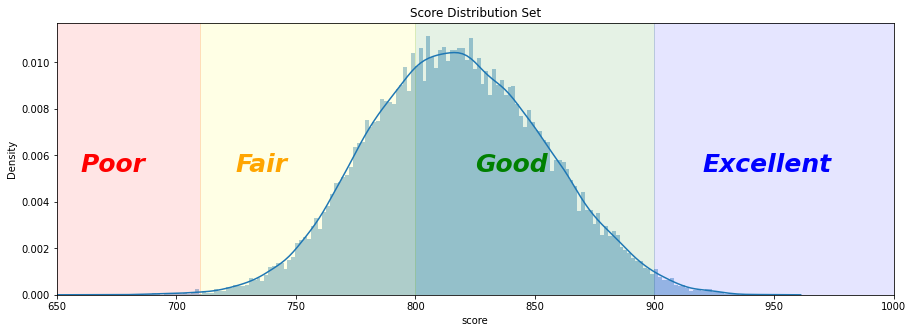

In [111]:
# Creating a Function for Generating Scores
targetscore = 1200
odds = 60
double_odds = 20

factor = double_odds/np.log(2)
offset = targetscore - factor * np.log(odds)
Scorecard_b['score'] = offset + factor * Scorecard_b['logit']


# Plotting the Scores for Train set

f, axes = plt.subplots(figsize=(15,5))
plt.xlim(650,1000)
sns.distplot(Scorecard_b['score'], bins = 200)
plt.axvspan(650,710, alpha=0.1, color='red')
plt.axvspan(710,800, alpha=0.1, color='yellow')
plt.axvspan(800,900, alpha=0.1, color='green')
plt.axvspan(900,1100, alpha=0.1, color='blue')
plt.text(660, 0.0053, 'Poor', color='red', fontweight='bold', style='italic', fontsize=25)
plt.text(725, 0.0053, 'Fair', color='orange', fontweight='bold', style='italic', fontsize=25)
plt.text(825, 0.0053, 'Good', color='green', fontweight='bold', style='italic', fontsize=25)
plt.text(920, 0.0053, 'Excellent', color='blue', fontweight='bold', style='italic', fontsize=25)
plt.title('Score Distribution Set')
plt.show()

### From the above plot, we see that the score us mostly normal distributed.
### Meaning that
- most of the customers fall in fair to good range
- a very low proportion of the customer fall in either the Poor range with high probability of default
- A very few customers fall in the exelent score range with a very low probability of default

#### We also see slight variations in the peaks of the distribution at score range ~810 and ~825
- This could also mean there there are more then 2 types of crearly identifiable groups in our dataset
- One of these groups may have a higher probability of default compared to the other

----------

#### Further Exploation of the results

In [112]:
## Select some columns of intresr
df_score = Final_DS
df_score["score"] = Scorecard_b.score

df_score = df_score[['total_income', 'loan_amount', 'term', 'interest_rate', 'own_car', 'own_house', 'income_type', 
'education_type', 'family_status', 'housing_type', 'region_population_ratio', 'days_birth', 'occupation_type', 'score']]

In [113]:
df_score['score'].describe()

count    26903.000000
mean       817.435594
std         36.812814
min        623.789361
25%        791.669166
50%        816.680626
75%        842.788066
max        946.796063
Name: score, dtype: float64

In [114]:
#create score range based on the statastics above
df_score['score_range'] = pd.cut(df_score['score'], [600, 750, 790,815, 850, 900, 1300])

<AxesSubplot:ylabel='score'>

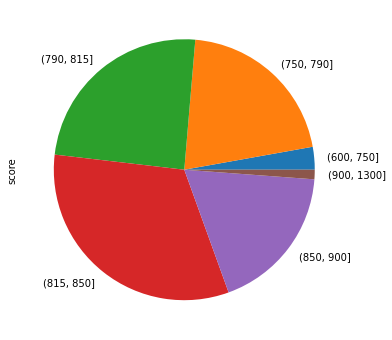

In [115]:
#Plot the score pie
df_score.groupby('score_range')[['score']].count().plot.pie(y='score', figsize=(6, 6), legend=False)

### We can see how the score is distributed by various variables below

In [116]:
#by income type
df_score.groupby(['income_type','score_range'])[['score_range']].count().unstack()

score_range                                                        
score_range           (600, 750] (750, 790] (790, 815] (815, 850] (850, 900] (900, 1300]
income_type                                                                             
Commercial associate         188       1168       1323       1867       1225          79
Pensioner                     97       1435       1677       1392        274          10
State servant                 73        417        439        647        331          18
Student                        0          0          0          1          0           0
Unemployed                     0          0          0          1          0           0
Working                      400       2585       3152       4800       3095         209

In [117]:
#by education
df_score.groupby(['education_type','score_range'])[['score_range']].count().unstack()

score_range                                                        
score_range                    (600, 750] (750, 790] (790, 815] (815, 850] (850, 900] (900, 1300]
education_type                                                                                   
Academic degree                         1          2          2          3          2           0
Higher education                      217       1206       1488       1947       1194          73
Incomplete higher                       6         90        112        278        308          36
Lower secondary                         8         58         81        120         79           4
Secondary / secondary special         526       4249       4908       6360       3342         203

In [118]:
#by family status
df_score.groupby(['family_status','score_range'])[['score_range']].count().unstack()

score_range                                                        
score_range           (600, 750] (750, 790] (790, 815] (815, 850] (850, 900] (900, 1300]
family_status                                                                           
Civil marriage                50        466        625        921        575          38
Married                      550       3900       4354       5542       2673          92
Separated                     40        336        494        603        286          10
Single / not married          63        487        657       1255       1303         175
Widow                         55        416        461        387         88           1

In [119]:
#by house type
df_score.groupby(['housing_type','score_range'])[['score_range']].count().unstack()

score_range                                                        
score_range          (600, 750] (750, 790] (790, 815] (815, 850] (850, 900] (900, 1300]
housing_type                                                                           
Apartment                   231       1507       1802       2307       1145          68
Co-op apartment               2         13         14         33         28           2
Co-op house                  56        559        606        791        435          23
House                       207       1551       1853       2286       1179          77
Municipal apartment          27        223        257        277        153           5
Office apartment              1         42         56         76         48           6
Rented apartment              3         41         70        147        146          16
Rented room                 147       1073       1166       1531        804          48
Rented studio                82        514        599        774        406          20
With parents                  2         82        168        486        581          51

In [121]:
#by occupation type
df_score.groupby(['occupation_type','score_range'])[['score_range']].count().unstack()

score_range                                                        
score_range            (600, 750] (750, 790] (790, 815] (815, 850] (850, 900] (900, 1300]
occupation_type                                                                          
Accountants                    30        159        181        260        175           6
Cleaning staff                 16        128        102        116         45           1
Cooking staff                   9        101        136        185        112           8
Core staff                     60        397        497        775        561          34
Drivers                        66        350        400        531        318          18
HR staff                        2         11         15         11         11           1
High skill tech staff          29        176        196        339        214          15
IT staff                        0          8          1         15         16           2
Laborers                      144        881       1114       1740       1103          78
Low-skill Laborers              6         24         31         81         56          10
Managers                       82        446        451        513        242          12
Medicine staff                 27        157        180        242        113          11
Other                         210       2102       2481       2585        980          58
Private service staff           3         39         54         80         47           1
Realty agents                   0         11         18         26         17           0
Sales staff                    45        417        547        973        732          45
Secretaries                     3         14         19         35         41           3
Security staff                 22        171        152        169         95           8
Waiters/barmen staff            4         13         16         32         47           5

-------------------

#### References
- Code from MBD class exercises & solutions by Philipp BORCHERT - IESEG School of Management
- Parts of pre-processing codes insipred by machine learning pipeline shared by Minh Phan - IESEG School of Management
- Solution inspiration: https://blogs.sas.com/content/subconsciousmusings/2019/01/18/building-credit-scorecards-using-statistical-methods-and-business-logic/
- https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097
- https://www.geeksforgeeks.org/z-score-for-outlier-detection-python/
- https://www.investopedia.com/ask/answers/070915/what-difference-between-present-value-annuity-and-future-value-annuity.asp#:~:text=Present%20value%20and%20future%20value,will%20be%20achieved%20over%20time.
- https://towardsdatascience.com/fraud-detection-with-cost-sensitive-machine-learning-24b8760d35d9
- https://scorto.com/credit-scoring-article/


--------